<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

In [78]:
#%pip install openpyxl

In [79]:
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [80]:
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [81]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [82]:
column_rename_dict = {old_name: new_name for old_name, new_name in zip(df.columns, header_names)}

df.rename(columns=column_rename_dict, inplace=True)

In [83]:
print(df['BEDS'])

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4801, dtype: int64


In [84]:
str_col = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME' , 'LONG_NAME', 'FORMATTED_ADDRESS']
int_col = ['BEDS', 'BATH','PROPERTYSQFT']
float_col = ['PRICE']

In [85]:
df.shape

(4801, 17)

In [86]:
df.isna().any()

BROKERTITLE                    False
TYPE                           False
PRICE                          False
BEDS                           False
BATH                           False
PROPERTYSQFT                   False
ADDRESS                        False
STATE                          False
MAIN_ADDRESS                   False
ADMINISTRATIVE_AREA_LEVEL_2    False
LOCALITY                       False
SUBLOCALITY                    False
STREET_NAME                    False
LONG_NAME                      False
FORMATTED_ADDRESS              False
LATITUDE                       False
LONGITUDE                      False
dtype: bool

In [87]:
df[str_col] = df[str_col].apply(lambda x: x.astype(str))

In [88]:
df[int_col] = df[int_col].apply(lambda x: x.astype(int))

In [89]:
df[float_col] = df[float_col].apply(lambda x: x.astype(float))

In [90]:
df.drop_duplicates(inplace = True)


In [91]:
df.loc[df['BATH'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [92]:
df.loc[df['PRICE'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [93]:
df.loc[df['BEDS']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [94]:
df.loc[df['PROPERTYSQFT']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [95]:
df['FORMATTED_ADDRESS'] = df['FORMATTED_ADDRESS'].apply(lambda x: x.replace('#', ''))


In [96]:
le = LabelEncoder()

In [97]:
columns_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']


In [98]:
df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [99]:
df.to_excel('test.xlsx')

In [100]:
X = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','SUBLOCALITY','STREET_NAME','ADMINISTRATIVE_AREA_LEVEL_2']]
y = df['PRICE']

In [101]:
X = X.dropna()
y = y[X.index]


In [102]:
print(df['BEDS'])

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4587, dtype: int32


<Axes: >

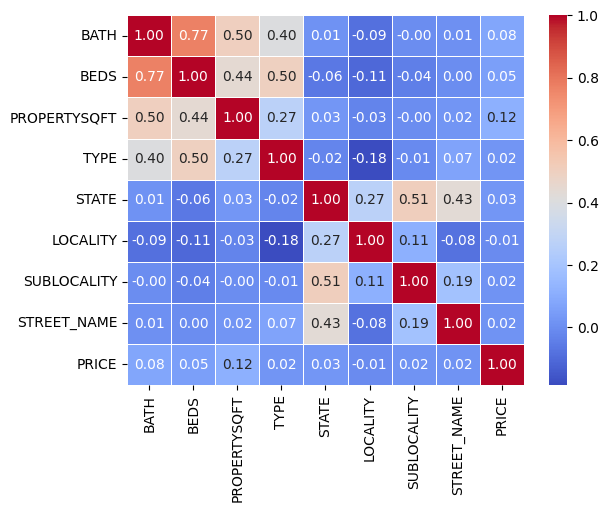

In [103]:
selected_df =  df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','LOCALITY','SUBLOCALITY','STREET_NAME', 'PRICE']]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

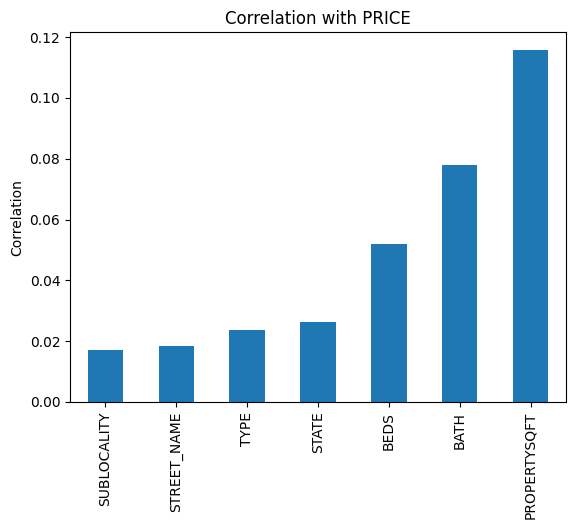

In [104]:
# Select the columns
cor_df = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','SUBLOCALITY','STREET_NAME', 'PRICE']]

# Calculate the correlation with 'PRICE'
correlation = cor_df.corr()['PRICE'].drop('PRICE')

# Plot the correlation values
correlation.sort_values().plot(kind='bar')
plt.title('Correlation with PRICE')
plt.ylabel('Correlation')
plt.show()

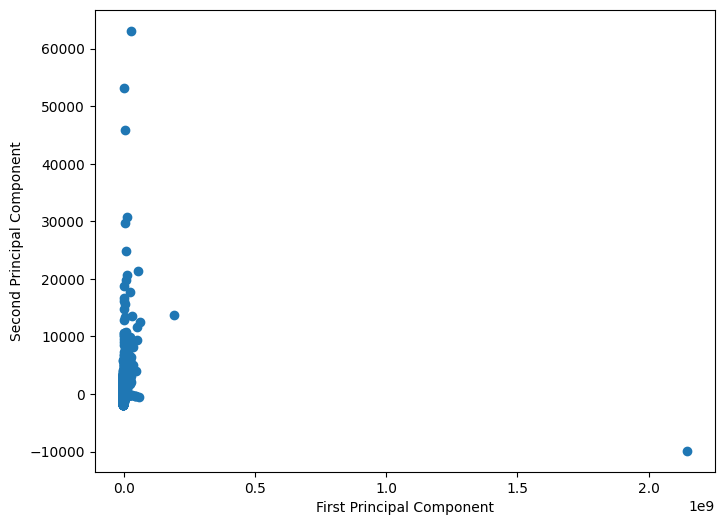

In [105]:

selected_df = selected_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])


plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [106]:
df.dtypes

BROKERTITLE                     object
TYPE                             int32
PRICE                          float64
BEDS                             int32
BATH                             int32
PROPERTYSQFT                     int32
ADDRESS                         object
STATE                            int32
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int32
LOCALITY                         int32
SUBLOCALITY                      int32
STREET_NAME                      int32
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_
y_predict = reg.predict(X_test)

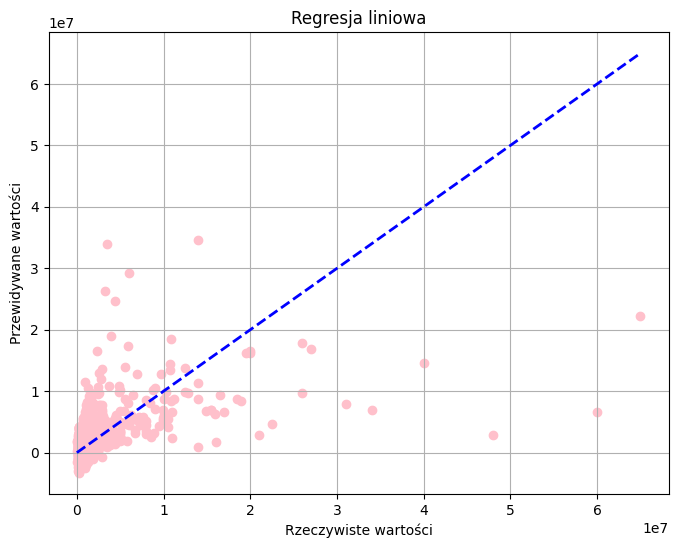

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import  HuberRegressor

In [110]:
y_true = y_test
mean_absolute_error(y_true,y_predict)

2071026.3466453233

In [111]:
y_true = y_test
median_absolute_error(y_true,y_predict)

1528511.6329497946

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 17%

In [112]:
y_true = y_test
r2_score(y_true,y_predict)

0.10673758157800395

In [113]:
huber = HuberRegressor().fit(X_train, y_train)
huber.coef_
huber.intercept_
y_predict_huber = huber.predict(X_test)

c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [114]:
y_true = y_test
mean_absolute_error(y_true,y_predict_huber)

1158595.6278293259

In [115]:

y_true = y_test
median_absolute_error(y_true,y_predict_huber)
     

325140.58266607614

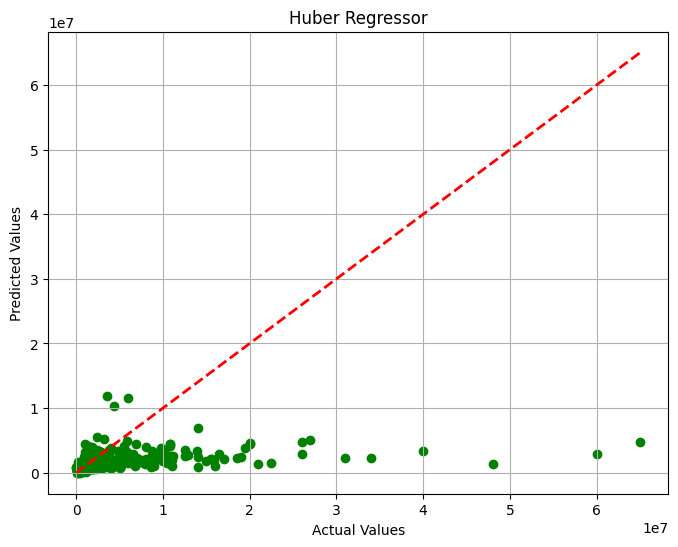

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_huber, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

In [117]:
huber_model = HuberRegressor().fit(X_train, y_train)
huber_model.score(X_train, y_train)
huber_model.coef_
huber_model.intercept_
predictions_huber = np.round(huber_model.predict(X_test))
print(predictions_huber)

[ 211037. 1005814. 1229158. ... 1573716. 1022888.  685973.]


c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 19% Nie wiem dlaczego za kazdym razem, gdy włączymy od nowa plik wyniki są różne, chyba ze wzgledu na dobieranie testowego modelu


In [118]:
y_true = y_test
r2_score(y_true,y_predict_huber)

0.1095559490404181

In [119]:
huber = HuberRegressor().fit(X_train,y_train)
huber.score(X_train,y_train)
huber.coef_
huber.intercept_
y_predic_huber = np.round(huber.predict(X_test))
print (y_predic_huber)

[ 211037. 1005814. 1229158. ... 1573716. 1022888.  685973.]


c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [120]:
from sklearn.model_selection import cross_val_score
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores = cross_val_score(lin, X , y, cv=rkf, scoring='neg_mean_absolute_error')
print(cv_scores)

[-2053198.19077949 -2008956.79273706 -2319612.17299628 -3955007.21622292
 -1948969.14583259 -3659031.3366234  -2089821.10022994 -2340045.11797963
 -2727835.94885925 -2026371.04020482 -2634446.09923628 -1887880.04858564
 -3756597.05991547 -2125556.02794916 -2093106.35130425]


Wielomian drugiego i trzeciego stopnia, regresja.

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [122]:
#2
degree2_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression())])

degree2_pipeline.fit(X_train, y_train)
predictions_degree2 = np.round(degree2_pipeline.predict(X_test))
print(predictions_degree2)
print("2 stopien r2 ", degree2_pipeline.score(X_test, y_test))

[ -724113.  8998916. -1469085. ...  2372147.  1422040.  4771403.]
2 stopien r2  -5.759857497248087


In [123]:

repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_2 = PolynomialFeatures(2)
X_transformed = poly_features_2.fit_transform(X)
cross_val_scores_2nd_degree = cross_val_score(linear_model, X_transformed, y, cv=repeat_kfold, scoring='neg_mean_absolute_error')
print(cross_val_scores_2nd_degree)

[ -4873309.44027234  -9980342.3846635   -4659817.32227447
  -4236139.62610684  -3834487.70978149  -4081951.91841715
  -3848349.13083834  -5695511.31687046  -4921525.017497
  -4308208.10081608  -5044926.92047561  -4113471.95772962
  -4059439.37053301 -24025909.8455732   -4413019.32318933]


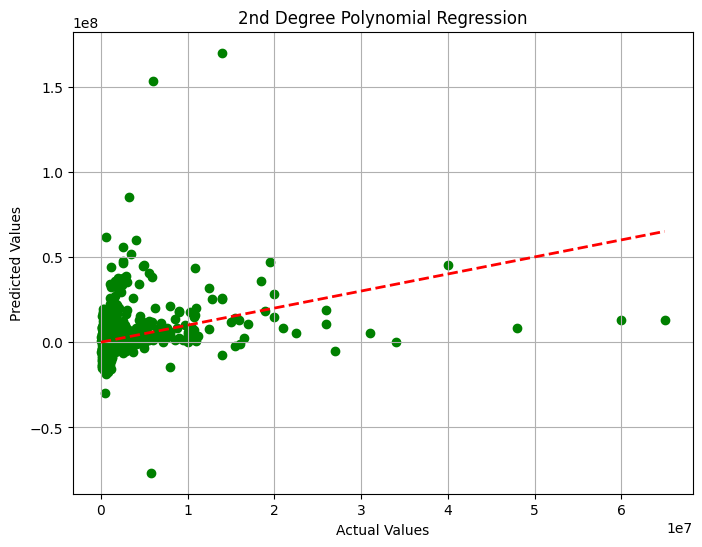

In [124]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('2nd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [125]:
#3 stopien

degree3_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])


degree3_pipeline.fit(X_train, y_train)


predictions_degree3 = np.round(degree3_pipeline.predict(X_test))


print(predictions_degree3)
print("3 stopien r2 ", degree3_pipeline.score(X_test, y_test))

[ 8717340.  3009000.  3538606. ...  2571864. -1695061.  4828596.]
3 stopien r2  -299.9674686236424


In [80]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,2,315000.0,2,2,1400,2 E 55th St Unit 803,207,"2 E 55th St Unit 803New York, NY 10022",26,4,10,56,Regis Residence,"Regis Residence, 2 E 55th St 803, New York, NY...",40.761255,-73.974483
1,Brokered by Serhant,2,195000000.0,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,205,Central Park Tower Penthouse-217 W 57th New Yo...,28,4,12,117,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,7,260000.0,4,2,2015,620 Sinclair Ave,301,"620 Sinclair AveStaten Island, NY 10312",28,4,16,153,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,2,69000.0,3,1,445,2 E 55th St Unit 908W33,161,"2 E 55th St Unit 908W33Manhattan, NY 10022",28,4,12,117,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,12,55000000.0,7,2,14175,5 E 64th St,227,"5 E 64th StNew York, NY 10065",28,4,12,117,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


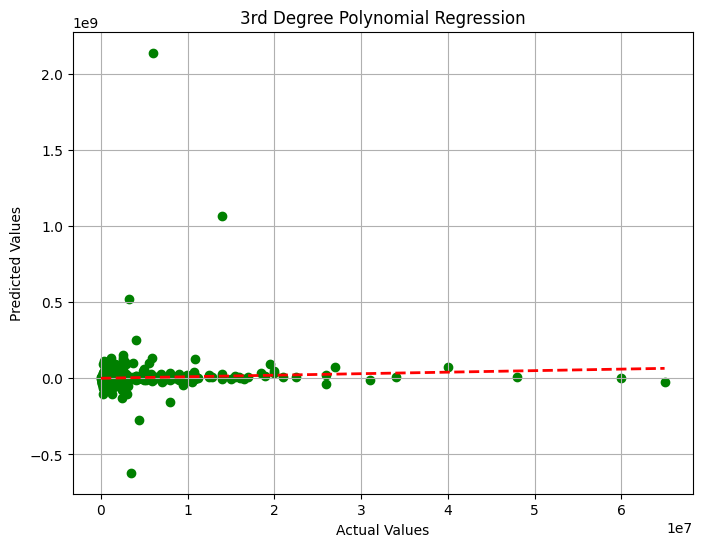

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [127]:
#cross knn
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
cross_val_scores_knn = cross_val_score(knn_model, X, y, cv=rkf, scoring='neg_mean_absolute_error')
print(cross_val_scores_knn)

[-2803259.13798112 -1092221.63326071 -1290203.31842966 -3493151.29298437
  -999898.15885133 -3422853.67901235 -1931108.00254176 -1488793.64958197
 -1125633.1039622  -1818575.15921483 -2149272.27378359 -1022547.19317357
 -3565491.04289349 -1257315.90621592 -1086499.44274809]


In [128]:
#cross 3 stopien
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_3 = PolynomialFeatures(3)
X_transformed_3 = poly_features_3.fit_transform(X)
cross_val_scores_3rd_degree = cross_val_score(linear_model, X_transformed_3, y, cv=repeat_kfold, scoring='neg_mean_absolute_error')
print(cross_val_scores_3rd_degree)

[-13631613.06404311 -25221937.85965455 -15539699.9370358
  -4443364.0686841  -13616664.46448949  -3726455.01084992
 -30715648.08071276 -22703344.20468616 -57328446.59125406
 -13687452.8126392  -25744893.83234695 -12389105.90577615
  -4196469.19947629 -46561978.02329435 -15448981.57025741]


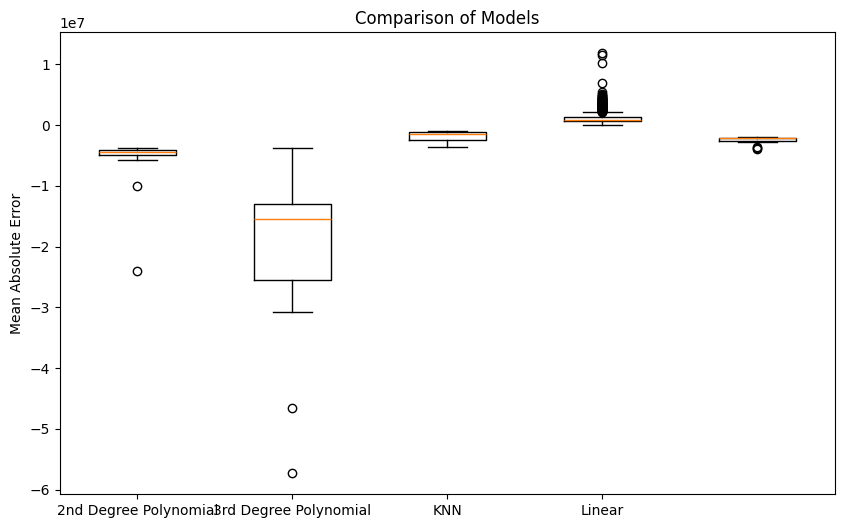

In [129]:
#boxplot dla wszystkich modeli
plt.figure(figsize=(10, 6))
plt.boxplot([cross_val_scores_2nd_degree, cross_val_scores_3rd_degree, cross_val_scores_knn,predictions_huber, cv_scores])
plt.xticks([1, 2, 3, 4], ['2nd Degree Polynomial', '3rd Degree Polynomial', 'KNN', 'Linear'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Models')
plt.show()
